In [1]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
df_loan = pd.read_csv('loan_prediction-II.csv', sep = ';')

# Agregamos un campo numérico de la variable dependiente.
df_loan['Loan_Status_Numerical'] = pd.factorize(df_loan['Loan_Status'])[0]

#Limpiamos el dataset quitando los registros que tengan valores nulos
df_loan.dropna(inplace = True)
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Nacionality,Loan_Status,Loan_Status_Numerical
0,LP001001,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,F,N,0
1,LP001002,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,N,Y,1
2,LP001003,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,N,Y,1
3,LP001004,Male,Yes,0,Not Graduate,No,2333,1516,95.0,360.0,1.0,Urban,N,Y,1
4,LP001005,Male,Yes,3+,Graduate,No,3036,2504,158.0,360.0,0.0,Semiurban,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11492,LP012493,Male,Yes,3+,Graduate,No,8750,4996,130.0,360.0,1.0,Rural,N,Y,1
11494,LP012495,Male,No,0,Graduate,No,5941,4232,296.0,360.0,1.0,Semiurban,N,Y,1
11495,LP012496,Male,No,0,Not Graduate,No,2346,1600,132.0,360.0,1.0,Semiurban,N,Y,1
11497,LP012498,Male,Yes,0,Graduate,No,2333,2417,136.0,360.0,1.0,Urban,N,Y,1


### Pregunta Nº 1: 

> **_Definir el problema de la naturaleza que se tiene a continuación, además de los objetivos de negocio bien definidos_**

El problema identificado es la demora en la evaluación de la calificación de un crédito personal a un cliente de la entidad financiera. Por lo cual, la empresa se ve en la necesidad de implenentar un modelo en base a sus datos históricos, si el cliente solicitante califica o no a la solicitud de crédito.

------------------

### Pregunta Nº 2

> **_¿Qué tipo de variables se utilizan en el problema de negocio?_**

Las variables utilizadas en este dataset son:

- Categóricos Nominales
- Cuantitativas Discretas
- Cuantitativas Continuas

In [3]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Numerical
count,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.00000
mean,4196.874186,2751.356453,147.811672,342.794613,0.856117,0.72009
std,3620.729620,2974.582839,70.971300,65.164894,0.350991,0.44898
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.00000
25%,2526.000000,1560.000000,108.000000,360.000000,1.000000,0.00000
50%,3333.000000,2083.000000,132.000000,360.000000,1.000000,1.00000
75%,4583.000000,3167.000000,172.000000,360.000000,1.000000,1.00000
max,81000.000000,33854.000000,600.000000,480.000000,1.000000,1.00000


----------------------------------------------------------------------- 

### Pregunta Nº 3

> **_Realizar un informe sobre las principales medidas de tendencia central y de dispersión. Cuál de los estados de préstamo presenta mayor homogeneidad respecto a su ingreso como dependiente_**

El dataset presenta datos outliers, pues considero que una persona tenga un sueldo de 150

In [4]:
df_loan['ApplicantIncome'].describe()

count     8910.000000
mean      4196.874186
std       3620.729620
min        150.000000
25%       2526.000000
50%       3333.000000
75%       4583.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

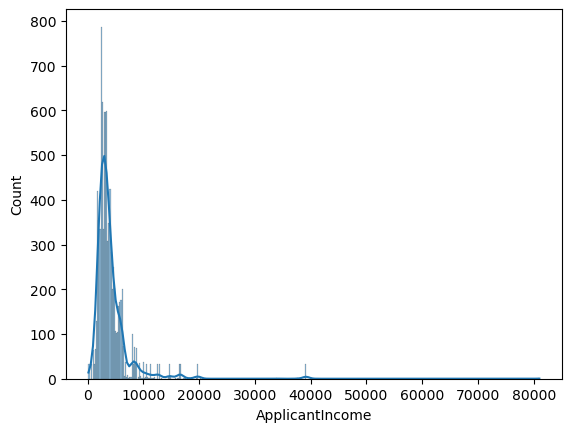

In [5]:
sns.histplot(df_loan.ApplicantIncome, kde = True)
plt.show()

In [6]:
print("Asimetria: %f" %  df_loan['ApplicantIncome'].skew())
print("Kurtosis: %f" %  df_loan['ApplicantIncome'].kurt())

Asimetria: 6.770521
Kurtosis: 80.911250


> **Valor de asimetría positivo. Se valida en la cresta del histplot.**

> **Kurtosis leptokurtica, pues el valor de kurtosis es > 0. Se valida en el gráfico de Histplot**


In [7]:
df_loan['CoapplicantIncome'].describe()

count     8910.000000
mean      2751.356453
std       2974.582839
min          0.000000
25%       1560.000000
50%       2083.000000
75%       3167.000000
max      33854.000000
Name: CoapplicantIncome, dtype: float64

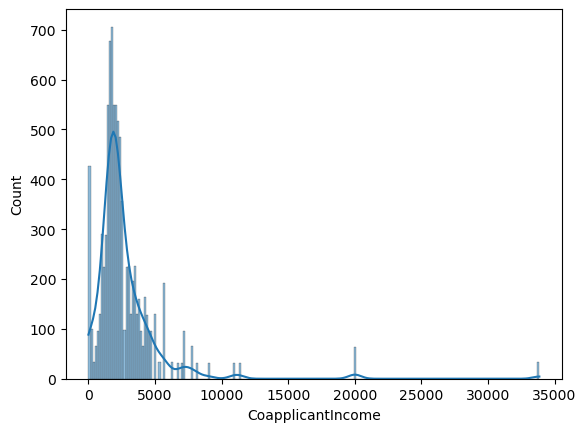

In [8]:
sns.histplot(df_loan.CoapplicantIncome, kde = True)
plt.show()

In [9]:
print("Asimetria: %f" %  df_loan['CoapplicantIncome'].skew())
print("Kurtosis: %f" %  df_loan['CoapplicantIncome'].kurt())

Asimetria: 6.031723
Kurtosis: 51.539593


> **Valor de asimetría positivo. Se valida en la cresta del histplot**

> **Kurtosis leptokurtica, pues el valor de kurtosis es > 0. Se valida en el gráfico de Histplot**

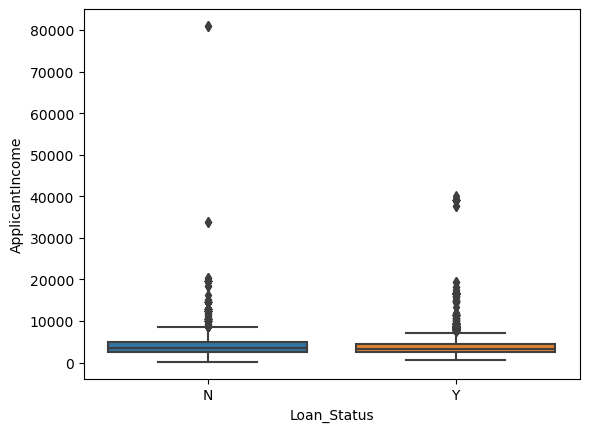

In [10]:
sns.boxplot(data=df_loan, y = "ApplicantIncome", x = "Loan_Status")
plt.show()

Según el gráfico de boxplot, se puede inferir que el valor del **Sueldo Dependiente** no es la única variable directa para la toma de decisión si un cliente se le brinda el crédito o no. De no ser así, todas las personas que ganen mas del máximo, obtendrían el préstamo.

----------------------------------------

## Pregunta Nº 4

>  Evaluar los outliers o casos atípicos univariados para las variables cuantitativas. Muestre los principales gráficos para identificarlos y muéstrelos

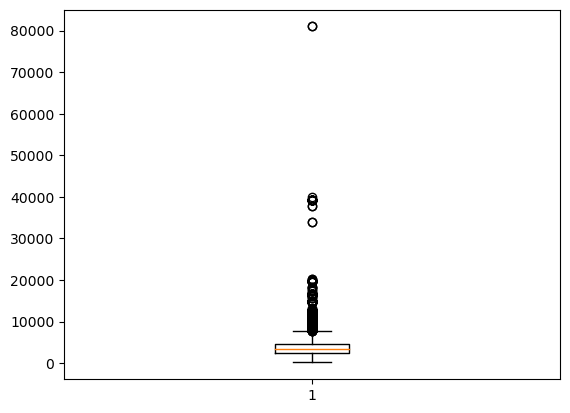

In [11]:
plt.boxplot(df_loan.ApplicantIncome)
plt.show()

> **Existe valores atípicos (outliers) dentro del dataset.** Por lo que no deberían ser considerados dentro del proceso de entrenamiento del modelo.

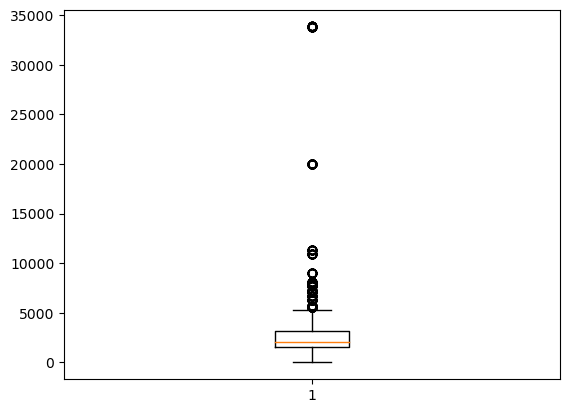

In [12]:
plt.boxplot(df_loan.CoapplicantIncome)
plt.show()

> **Existe valores atípicos dentro del dataset.**> **Existe valores atípicos (outliers) dentro del dataset.** Por lo que no deberían ser considerados dentro del proceso de entrenamiento del modelo.

-------------------------------

## Pregunta Nº 5

>  Evaluar la colinealidad o multicolinealidad en las variables, identificando aquellas en las cuáles su coeficiente de asociación supere el punto de corte de +-0.3.

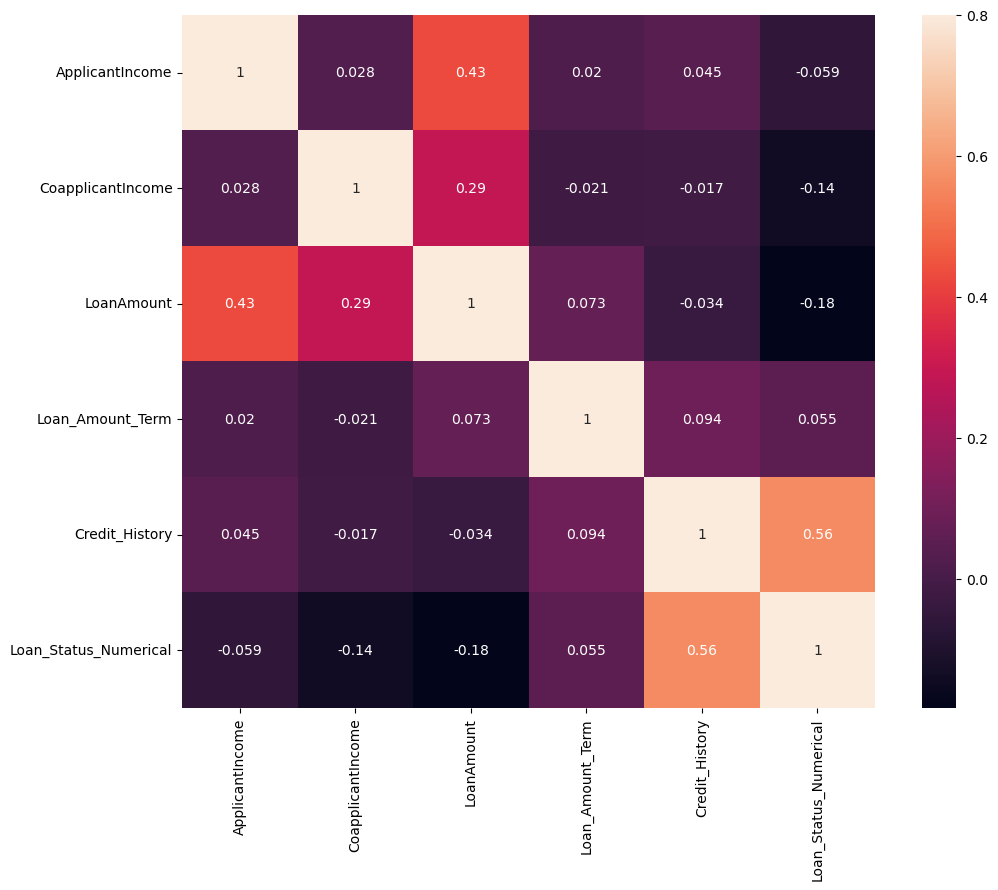

In [13]:
# Matriz de correlación:
plt.figure(figsize=(12,9))
corrmat = df_loan.corr()
sns.heatmap(corrmat, vmax=.8, square=True, annot=True,);
plt.show()

> Se valida que existe una alta correlación entre la variable **Credit_History** y la variable dependiente **Loan_Status_Numerical**

> Se valida que existe multicolinealidad moderada entre las variables independientes **LoanAmount** y **ApplicantIncome**.

---------------------------------

## Pregunta Nº 6

>  Realice un análisis de asociación de la variable dependiente respecto a alguna variable cualitativa y otra cuantitativa. Comentes sus resultados.

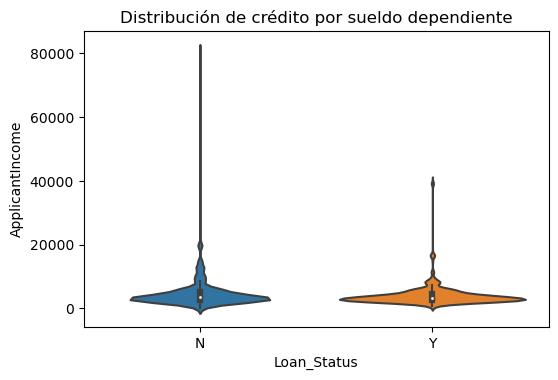

In [14]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Loan_Status',
        y     = 'ApplicantIncome',
        data  = df_loan,
        ax    = ax
    )

ax.set_title('Distribución de crédito por sueldo dependiente');
plt.show()

In [15]:
# Obtenemos el valor de correlación entre la variable dependiente (categórica) y la variable independiente (numérica)

filterList = df_loan.groupby('Loan_Status')['ApplicantIncome'].apply(list)
correlationResult = f_oneway(*filterList)
print('Valor de correlación entre Loan Status y ApplicationIncome: ', correlationResult[1])

Valor de correlación entre Loan Status y ApplicationIncome:  2.040322114512483e-08


Se valida visualmente y mediante el método f_oneway, que no existe una correlación entre las variables Loan_Status y ApplicantIncome.

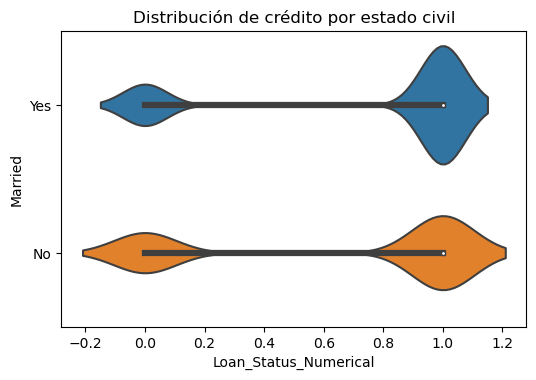

In [16]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Loan_Status_Numerical',
        y     = 'Married',
        data  = df_loan,
        ax    = ax
    )

ax.set_title('Distribución de crédito por estado civil');
plt.show()

In [17]:
# Obtenemos el valor de correlación entre la variable dependiente (numérica) y la variable independiente (categórica)

filterList = df_loan.groupby('Married')['Loan_Status_Numerical'].apply(list)
correlationResult = f_oneway(*filterList)
print('Valor de correlación entre Loan Status y ApplicationIncome: ', correlationResult[1])

Valor de correlación entre Loan Status y ApplicationIncome:  5.696737784738071e-16


Se valida visualmente y mediante el método f_oneway, que no existe una correlación entre las variables Loan_Status_Numerical y Married.